In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib as plt
import tabula as tb
import re
import warnings 
warnings.simplefilter('ignore')

In [2]:
os.chdir('/Users/andresabala/Downloads/Data Analysis Projects/CA Agribusiness/Exports')

# 1. CA Commodity Exports- 2010 to 2021. Loading Excel WBs and Scraping              PDFs https://www.cdfa.ca.gov/Statistics/PDFs/2022_Exports_Publication.pdf)

            * we will add a 'Category' column for each final dataframe (pdf + excel data)
            * make a function to create a column based off of the 'Product' column
            * this is the equivalent to CASE WHEN in SQL 
            * use .pipe() method to cleanly insert into method chaining

In [2702]:
# function that defines the creation of a 'Category' column. Breaks all products into their export category. Used for future analysis

# words to replace in dataframes
replace_words= ({'Alfalfa Hay': 'Alfalfa',
                     'Alfalfa Seed': 'Alfalfa',
                    'Cattle & Calves': 'Cattle',
                     'Corn (For Grain': 'Corn (Grain)',
                     'Corn (Sweet': 'Corn (Sweet)',
                     'Corn, Sweet (Fresh': 'Corn (Sweet)',
                    'Cotton Lint': 'Cotton',
                    'Cotton, Lint': 'Cotton',
                    'Cottonseed': 'Cottonseed And Byproducts',
                    'Cotton, Seed': 'Cottonseed And Byproducts',
                    'Dairy And Product': 'Dairy And Products',
                    'Eggs (Chicken': 'Eggs',
                    'Eggs, Chicken': 'Eggs',
                    'Hay, Grain, Misc': 'Hay',
                    'Hay, Bermuda Grass': 'Hay',
                    'Hay, Misc': 'Hay',
                    'Milk And Cream': 'Dairy And Product',
                    'Berries, Blackberries': 'Blackberries',
                    'Berries, Blueberries': 'Blueberries',
                   'Berries, Raspberries': 'Raspberries', 
                    'Berries, Strawberries': 'Strawberries',
                    'Cabbage, Head': 'Cabbage',
                    'Chickens': 'Chicken',
                    'Salad Greens Nec': 'Salad Greens',
                    'Sheep And Lambs': 'Sheep',
                    'Rice (Excl. Seed': 'Rice',
                    'Seed For Planting, Veg & Vine': 'Seeds For Sowing',
                    'Silage, Misc': 'Silage',
                    'Tangerines & Mandarins': 'Tangerines And Mandarins',
                    'Tangerines': 'Tangerines And Mandarins',
                    'Tomatoes (Fresh Market': 'Tomatoes, Fresh',
                    'Tomatoes, Processing': 'Tomatoes, Processed',
                    'Tomatoes (Processing': 'Tomatoes, Processed',
                    'Veg And Vinecrop Seeds': 'Seeds for Sowing',
                    'Walnuts (English': 'Walnuts',
                    'Wheat (Excl. Seed': 'Wheat',
                    'Pomegrantates': 'Pomegranates',
                    'Onions, Dry': 'Onions',
                    'Other Pasture and Range': 'Pasture',
                    'Melons, Watermelon': 'Watermelons',
                     'Watermelon': 'Watermelons',
                     'Potatoes (Incl. Seed': 'Potatoes',
                     'Potatoes, Sweet': 'Sweet Potatoes',
                     'Turkeys': 'Turkey',
                     'Seeds for Sowing' : 'Seeds For Sowing', 
                     'Peaches': 'Peaches And Nectarines', 
                     'Peppers': 'Bell And Chili Peppers',
                     'Bell Peppers': 'Bell And Chili Peppers',
                     'Seed For Planting, Sunflower': 'Sunflower',
                     'Nursery Products': 'Flowers And Nursery',
                     'Flowers And Foliage': 'Flowers And Nursery'
                   })
    


def category_column(df):

    animal_products= ['Dairy And Products','Beef And Products',  
                    'Turkey','Eggs','Chicken',
                     'Apiary','Cattle', 'Dairy And Product', 'Eggs, Other', 'Honey', 
                      'Livestock, Misc', "Milk, Cow'S", 'Sheep', 'Apiary']
    
    
    field_crops= ['Alfalfa', 'Cotton','Tomatoes, Processed','Rice',
                'Hay', 'Potatoes','Wheat','Sweet Potatoes',
               'Cottonseed And Byproducts','Dry Beans',
                'Seeds For Sowing', 'Cottonseed',
                 'Corn (Grain)','Flowers And Foliage','Grain Hay',
                  'Horticulture','Irrigated Pasture','Other Pasture And Range',
                  'Pasture','Seeds for Sowing','Silage','Sudan Hay',]

    fruits= ['Wine','Table Grapes','Oranges And Products','Strawberries',
            'Blueberries','Raisins','Dried Plums','Peaches And Nectarines',
            'Lemons','Grapefruit','Plums','Cherries','Melons','Raspberries And Blackberries',
            'Pears','Grape Juice','Apples','Kiwi','Dates','Olives And Olive Oil',
            'Tangerines And Mandarins','Figs','Apricots','Avocados', 'Prunes', 'Blackberries','Cantaloupes',
             'Grapes','Honeydew Melons','Kiwifruit','Melons, Cantaloupe', 'Nectarines', 'Oranges','Plums, Dried',
             'Pomegranates', 'Raspberries','Watermelons']

    tree_nuts= ['Almonds','Walnuts','Pistachios']

    vegetables= ['Lettuce','Broccoli','Carrots','Tomatoes, Fresh','Celery',
                 'Onions','Cauliflower','Garlic','Spinach','Bell And Chili Peppers',
                 'Cabbage','Asparagus','Artichokes','Mushrooms','Brussels Sprouts','Cilantro',
                 'Corn','Corn (Grain)','Corn (Sweet)','Green Peas','Kale','Olives','Salad Greens',
                 'Squash','Sugar Beets','Sunflower']

    flowers=['Flowers And Nursery']
    
    timber= [ 'Firewood', 'Forest Products, Timber',]
    
    

    
    
    # use np.select() which requires condlist, and choice list
    
    condlist= [                                                          
        (df['Product'].isin(animal_products)), 
        (df['Product'].isin(field_crops)),
        (df['Product'].isin(fruits)),
        (df['Product'].isin(tree_nuts)),
        (df['Product'].isin(vegetables)),
        (df['Product'].isin(flowers)),
        (df['Product'].isin(timber))

                ]
    
    # choice of what each condition will be changed to in the new column
    
    choice=['Animal Product','Field Crop', 'Fruit', 'Tree Nut', 'Vegetable', 'Flower and Nursery', 'Timber']
    
    
    # create column based on the agricultural group each product belongs to:
    
    df['Category']= np.select(condlist,choice)           # <----- initialize column
    
    df['Category'].to_frame()                            # <----- converts df['Category'], which is a Series, into a Dataframe so we can merge onto the existing dataframe 
    
    return df.merge(df['Category'])#.drop_duplicates()





## 1a. CA Export - Excel 

In [4]:
# Make sure that all data is formatted exactly the same, otherwise cannot be automatede

# this is the file path to the folder containing all the excel files to parse

files_to_run= os.listdir('/Users/andresabala/Downloads/Data Analysis Projects/CA Agribusiness/Exports')


def excel_exportvalues():
    
    ca_export= []                                    # <----- this list will be appended with new dataframes created for each file
    
    for file in files_to_run:
        if file.startswith('1'):                          # <----- The files in which table 1 were used, were labeled as 1a, 1b, 1c, etc.
            print('Loading file {0}...'.format(file))           #<----- {0}: a placeholder, so  the name of the file being processed in the for loop will be substituted for {0}. So that we know on what step we are on when loading in the files
            
            ca_export.append(pd                                   # <------ appends each dataframe created to the new list, ca_export
                             .read_excel(os.path.join('/Users/andresabala/Downloads/Data Analysis Projects/CA Agribusiness/Exports', file),  #<----- os.path is a module that deals with path manipulation. Instead of hardcoding the path, we can concatenate the paths for each file in our list
                                sheet_name='TABLE_1',
                                header= 4, index_col= 1               # <---- header: deals with column labels being off, index_col: all extracted tables need to have an index column to merge on
                                )
                     )


    export_merged= ca_export[0].join(ca_export[1:]).reset_index()
  


    ca_export_2010_2018=(export_merged
                                .drop(export_merged.filter(regex='Unnamed').columns,axis=1)
                                .drop(export_merged.filter(regex='Rank').columns,axis=1)  # <---- drop columns with Rank in the title
                                .loc[:58]
                                .drop([53,54])                                          # <----- Drops totals that aren't relevant
                                .reset_index(drop=True)                               # <---- resets index, drops column created called 'index'
                                #.groupby('Product').mean()
                                )
    
    
    
  
    
    
    return ca_export_2010_2018


excel_exportvalues=excel_exportvalues()

excel_exportvalues


Loading file 1a 2012_Exports_CA.xlsx...
Loading file 1b 2014-2015 Exports.xlsx...
Loading file 1c 2017-2018 Exports (EU).xlsx...


,Product,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Almonds,2391.680000,2828.428000,3387.332000,4164.000000,4527.534000,5143.722000,4497.252000,4483.392000,4530.438000
1,Apples,19.746996,24.795196,29.108274,26.127799,24.600180,22.310808,18.404860,20.655631,21.712521
2,Apricots,13.535595,16.693671,17.405438,18.175793,16.523629,13.632255,14.077753,16.536232,10.728996
3,Artichokes,4.373000,4.298000,4.448000,3.990000,3.952000,3.142000,3.302000,3.552000,3.218000
4,Asparagus,18.523395,15.187837,19.906471,15.671067,13.881595,9.598185,16.737184,19.122426,20.008541
5,Avocados,28.126115,22.476575,36.766774,51.429029,34.435430,25.064219,28.851920,24.584344,48.957764
6,Beef And Products,293.469077,365.618623,373.605779,436.116643,403.941611,308.363713,312.099522,374.645391,413.791967
7,Bell And Chili Peppers,29.757045,27.142323,24.770661,28.143304,27.235271,26.910913,25.886269,25.817199,26.031798
8,Blueberries,26.257306,35.118618,46.977075,51.612467,54.526238,49.644868,43.403865,39.796062,37.496269
9,Broccoli,130.020298,105.072735,124.448373,126.099442,127.547952,113.210246,109.457096,90.141535,96.348710


## 1b. CA Export - PDF

     * cannot automate as easily, since pdf isn't uniform 
     * extract tables from multiple pages, concatenate results
     * use tabula library to import and extract tables from pdf, tb.read_pdf will return a list of dataframes 
     * (the first table we want spans two pages, 4 and 5. 
         So tb will return a list containing 2 items in the list.)

In [2671]:

#read in the table on page 4 and 5

def pdf_export_values(page1, page2):
  
    export1=(tb.read_pdf('Exports_Publication_2022.pdf', pages=page1,
                        relative_area=True,
                        relative_columns=True,
                        area=[11, 0, 95, 100],
                         columns=[12, 40,50, 60, 80]
                        )
            )
    export2= (tb.read_pdf('Exports_Publication_2022.pdf', pages=page2,
                        relative_area=True,
                        relative_columns=True,
                        area=[11, 0, 65, 100],
                         columns=[12, 40,50, 60,80]
                         )      
              )
    
    col_order= ['Product', '2019', '2020', '2021']
    
    pdf_concat=(pd
                  .concat(
                    ((export1[0]                                # <---- access the first item in export1 (tb.read_pdf creates a list, the first item in the list is the table we are interested in) )
                        .rename(columns={'Unnamed: 0':'Rank', 
                                 'Unnamed: 1':'Commodity', 
                                 'Unnamed: 2':'2019', 
                                 '$1 Million':'2020', 
                                 'Unnamed: 3': '2021', 
                                 'Percent':'%_Change'})
                      ),                                          # <-- can return more than one value, use ',' to add another value
        
                        (export2[0]
                        .rename(columns={'Unnamed: 0':'Rank', 
                                            'Unnamed: 1':'Commodity', 
                                            'Unnamed: 2':'2019', 
                                            '$1 Million':'2020', 
                                            'Unnamed: 3': '2021', 
                                            'Percent 1':'%_Change'})
                          )
                       )
                    )
                 .reset_index()
                 .loc[:56]
                 .rename(columns={'Commodity': 'Product'})
                 .assign(**{'Product' : lambda x:x['Product']           # <----- ** unpacks dictionary, assigns changes in place 
                                .replace({'Chickens':'Chicken'})         # <------ lambda functions ensure the code modifies the latest version of the dataframe. we're trying to limit intermediate variables and make code more readable. All method changes up until the lambda function are applied to the dataframe 
                                .str.title()
                                .str.strip(' 1,2,3,4,5'),
                            '2019': lambda x:x['2019']
                                .astype(str)
                                .str.replace(',', '')
                                .astype(float),
                            '2020':lambda x:x['2020']
                                .astype(str)
                                .str.replace(',', '')
                                .astype(float),
                            '2021':lambda x:x['2021']
                                .astype(str)
                                .str.replace(',', '')
                                .astype(float),
                           })
                
                 .drop(columns=['Rank', '%_Change', 'index'])
                 .reindex(columns = col_order)
                
               )
          
                        
                       
                    
    return pdf_concat



pdf_exportvalues=pdf_export_values('4','5')  






## 1c.- Final merged dataframe for export values

In [2503]:

# Merge excel and pdf export values

def export_excel_pdf(excel,pdf):
    
    
    exportvalues_merged=(excel
                        .merge(pdf, on='Product', how='inner')
                        .pipe(category_column)                           # <---- .pipe() takes the current dataframe and applies the function we defined at the top of the notebook (adds the 'Category' column)
                        .drop_duplicates()
                        .reset_index(drop=True)
                         
                         
                         .melt(id_vars= ['Product', 'Category'],        # <----- .melt() changes the df from long to wide, then we can use groupby().agg() to group by certain columns                              
                           var_name= 'Year', 
                           value_name= 'Total Export Value ( $ million)',
                           ignore_index=False)          
                        #.groupby(['Category', 'Product', 'Year']).agg({'Total Export Value ( $ million)': 'sum'})
                        
                         .reset_index(drop=True)
                         .round(2)
                        
                       )
                          
                      
    return exportvalues_merged



export_2010_2021=export_excel_pdf(excel_exportvalues, pdf_exportvalues)





# 2. CA Share of Total US Exports -- extract and join Excel and PDF data 

## 2a. CA Share: Excel 

      * Concatenate all excel data from 2010-2019
      * Determine datatypes on import
      * Make same adjustments to define range of dataframes and index columns using for loops
      * Join all dataframes in list to index column
       * Any further data cleaning

In [2504]:

# the key column that we want to join on, 'Commodity', has different row values (superscripts that aren't uniform)
#     we can edit the files using another for loop before ingesting into python




def excel_share_2010_2019():                         # <------ type either "Share" or 'Total' to view CA share of exports, or Total US Exports
    
    excel_share= []                                            # <----- list of edited key column, so everything should match 

    excel_index_edited=[]                                       # <----- this list will be appended with new dataframes created for each file

   

    rows= ['Animal Products','Field Crops', 
           'Fruits,', 'Tree Nuts','Vegetables']                   # <----- rows to get rid of since these are aggregates 
    
    
    
        
    animal_products= ['Dairy And Products',' Beef And Products',    # <---- all the product categories were found by querying excel_edited[0]['Product'].loc[0:80].tolist(). We could easily copy and paste the row values to new variable
                        'Turkey','Eggs','Chicken']
    
    field_crops= ['Cotton','Tomatoes, Processed','Rice',
                'Hay', 'Potatoes','Wheat','Sweet Potatoes',
               'Cottonseed And Byproducts','Dry Beans',
                'Seeds For Sowing']
    
    fruits= ['Wine','Table Grapes','Oranges And Products','Strawberries',
            'Blueberries','Raisins','Dried Plums','Peaches And Nectarines',
            'Lemons','Grapefruit','Plums','Cherries','Melons','Raspberries And Blackberries',
            'Pears','Grape Juice','Apples','Kiwi','Dates','Olives And Olive Oil',
            'Tangerines And Mandarins','Figs','Apricots','Avocados']
    
    tree_nuts= ['Almonds','Walnuts','Pistachios']
    
    vegetables= ['Lettuce','Broccoli','Carrots','Tomatoes, Fresh','Celery',
                 'Onions','Cauliflower','Garlic','Spinach','Bell And Chili Peppers',
                 'Cabbage','Asparagus','Artichokes','Mushrooms']

    

    
    
    
    for file in files_to_run:
        if file.startswith('2'):                                                 # <----- The files in which table 1 were used, were labeled as 2a, 2b, 2c, etc.
            print('Loading file {0}...'.format(file))

            excel_share.append(pd
                                .read_excel(os.path.join('/Users/andresabala/Downloads/Data Analysis Projects/CA Agribusiness/Exports', file), 
                                    header=2,
                                    sheet_name='TABLE_2',
                                    skiprows= 2,
                                    usecols='A:E'
                                        )
                                )

    for df in excel_share:                                                # <----- for every excel file, update the key column to drop all superscripts, instead of editing excel file directly. Set index column to new 'Product' column so we can join on index
        excel_index_edited.append(df
                            .rename(columns={'Commodity':'Product'})
                            .assign(** {'Product':lambda x:x['Product']
                                            .str.rstrip('1,2,3,4,5')
                                            .str.title()})
                            .set_index('Product')

                           )

    share_merged=(excel_index_edited[0]
                  .iloc[0:69]
                  .join(excel_index_edited[1:], how='inner')     # <---- for every dataframe in the list, join on the index. Specify the dataframe range to exclude footers and totals
                 )

    


    share_2010_2019= (share_merged
                         .reset_index()
                         .iloc[0:57]
                         .loc[lambda x:x['Product'].isin(rows)==False]
                         .drop(columns=['2016 Total U.S. Export Value_x',
                                        '2016 California Share of U.S. Exports_x'])
                        .rename(columns={'2016 Total U.S. Export Value_y': '2016 Total U.S. Export Value',
                                          '2016 California Share of U.S. Exports_y':'2016 California Share of U.S. Exports'})

                          )
    
    return share_2010_2019

    


excel_share_export=excel_share_2010_2019()  
    





Loading file 2a_2009-2010 Exports.xlsx...
Loading file 2f_2018-2019 Exports.xlsx...
Loading file 2d_2015-2016 Exports.xlsx...
Loading file 2e_2016-2017 Exports.xlsx...
Loading file 2b_2011-2012 Exports.xlsx...
Loading file 2c_2013-2014 Exports.xlsx...


## 2b. CA Share - PDF scraping 

In [2507]:

def pdf_ca_share(pdf, year1, year2, pg1, pg2):                    # <----- specify pdf file, 1st year of table, 2nd year, 1st page where the table is located in pdf, 2nd page of pdf 
    ca_share1_dfs= tb.read_pdf(pdf, pages=pg1,
                        relative_area=True,
                        relative_columns=True,
                        area=[12, 0, 95, 100],
                         columns=[25, 40, 55,70, 80],
                       )
    ca_share2_dfs= tb.read_pdf(pdf, pages=pg2,
                        relative_area=True,
                        relative_columns=True,
                        area=[12, 0, 52, 100],
                         columns=[20, 40, 55,70, 80]
                       )
    
    
    rows=['Animal Products','Field Crops', 'Fruits,', 'Tree Nuts','Vegetables']     # <---- rows to eliminate since these are totals

    
    pdf= (pd.
             concat(
                ((ca_share1_dfs[0]
                  .rename(columns={'Unnamed: 0':'Product', '$1 Million':year1 + ' ' +  'Total U.S. Export Value',  
                              'In Percent': year1 + ' ' + 'California Share of U.S. Exports', '$1 Million.1':year2 + ' ' + 'Total U.S. Export Value',
                              'In Percent.1': year2 + ' ' + 'California Share of U.S. Exports', 'Percent Change': '% Change'})
                      ),
                (ca_share2_dfs[0]
                  .rename(columns={'Unnamed: 0':'Product', '$1 Million':year1 + ' ' + 'Total U.S. Export Value',  
                              'In Percent': year1 + ' ' + 'California Share of U.S. Exports', '$1 Million.1': year2 + ' ' + 'Total U.S. Export Value',
                              'In Percent.1': year2 + ' ' + 'California Share of U.S. Exports', 'Percent Change': '% Change'})
                          )
                     )
                  )
            .assign(**{'Product': lambda x:x['Product']
                          .str.title()
                          .str.strip(' 1,2,3'),
                       '2020 Total U.S. Export Value': lambda x:x['2020 Total U.S. Export Value']
                          .astype(str)
                          .str.replace(',', '')
                          .astype(float),
                       '2021 Total U.S. Export Value': lambda x:x['2021 Total U.S. Export Value']
                          .astype(str)
                          .str.replace(',', '')
                          .astype(float)
                      
                      })
                   
            .loc[lambda x:x['Product'].isin(rows)==False]
            #.pipe(category_column)
            .reset_index(drop=True)
            .drop(columns=['% Change'])
          
        )


    
    return pdf
           

# pdf extracted for california shares from 2020-2021
pdf_share_export=pdf_ca_share('Exports_Publication_2022.pdf','2020','2021','6','7')



## 2c. CA Share- Merge Excel and PDF

                * In the final dataframe, drop the Total U.S. Exports Values, we are only interested in the CA
                    shares

In [9]:
# melt the df and only show the CA share columns in the final df


def ca_share_final(excel, pdf):
        
    col_order= ['Product', 'Category', '2009 Total U.S. Export Value',                        # <----- order for columns
       '2009 California Share of U.S. Exports', '2010 Total U.S. Export Value',
       '2010 California Share of U.S. Exports', '2011 Total U.S. Export Value',
       '2011 California Share of U.S. Exports', '2012 Total U.S. Export Value',
       '2012 California Share of U.S. Exports', '2013 Total U.S. Export Value',
       '2013 California Share of U.S. Exports', '2014 Total U.S. Export Value',
       '2014 California Share of U.S. Exports', '2015 Total U.S. Export Value',
       '2015 California Share of U.S. Exports',  '2016 Total U.S. Export Value',
       '2016 California Share of U.S. Exports', '2017 Total U.S. Export Value',
       '2017 California Share of U.S. Exports', '2018 Total U.S. Export Value',
       '2018 California Share of U.S. Exports', '2019 Total U.S. Export Value',
       '2019 California Share of U.S. Exports', '2020 Total U.S. Export Value',
        '2020 California Share of U.S. Exports', '2021 Total U.S. Export Value',
         '2021 California Share of U.S. Exports'] 
       
    final= (excel
            .merge(pdf, on='Product', how='inner')
            .pipe(category_column)
            .drop_duplicates()
            .reset_index()
            
            #.set_index('Product',drop=True)
            #.reset_index()
            #.melt(id_vars='Category',var_name='Year', value_name= 'CA % Share of U.S. Exports')
            .reindex(columns=col_order)
            #.loc[:, lambda x:x.columns.str.contains('Share')]
            .drop(excel.filter(regex='Total').columns,axis=1)      # <---- drop all columns that contain 'Total', must do this for both merged dataframes
            .drop(pdf.filter(regex='Total').columns,axis=1)
   
             .melt(id_vars= ['Product', 'Category'],        # <----- .melt() changes the df from long to wide, then we can use groupby().agg() to group by certain columns                              
               var_name= 'Year', 
               value_name= 'Share',
               ignore_index=False) 
            .assign(**{'Year': lambda x:x['Year'].str.replace('California Share of U.S. Exports', '')})
            #.query("Year.str.match('Share')")
            #.groupby(['Country', 'Product']).agg({'Total Export Value ( $ million)': 'sum'})
            
            
           )
    
    return final
 

    
share_pdf_excel=ca_share_final(excel_share_export,pdf_share_export)


share_pdf_excel                                             # <------ To make sure all of the 'Total U.S. Exports' values were deleted, we can use share_pdf_excel['Year'].str.contains('Total').sum(). This is = 0 so all the data we didn't want is deleted




,Product,Category,Year,Share
0,Almonds,Tree Nut,2009,100.0
1,Pistachios,Tree Nut,2009,100.0
2,Walnuts,Tree Nut,2009,100.0
3,Apples,Fruit,2009,2.4
4,Apricots,Fruit,2009,74.0
...,...,...,...,...
51,Seeds For Sowing,Field Crop,2021,19.5
52,Sweet Potatoes,Field Crop,2021,24.5
53,"Tomatoes, Processed",Field Crop,2021,100.0
54,Wheat,Field Crop,2021,0.2


# 3. Top 15 Export Markets for CA Ag products

## 3a. Destination Markets-- Excel

In [10]:
# files_to_run= os.listdir('/Users/andresabala/Downloads/Data Analysis Projects/CA Agribusiness/Exports')


 # values with '<3', aka the '<' sign, are messing up the dtype, we need to get rid of this to proceeed


def excel_exportmarkets():
    
    drop_rows=('1-', '2-', '3-', '4-', '5-', '6-', '7-', '8-', 
               '9-', '10-', '11-', '12-', '13-', '14-', '15-', 'Total',
               '1', '2', '3', '4', '5', 'Source',' ', 'Approximate', 'Change')
    
    markets= []
    markets_edited=[]
    
    for file in files_to_run:
        if file.startswith('2'):                          # <----- The files in which table 1 were used, were labeled as 1a, 1b, 1c, etc.
            print('Loading file {0}...'.format(file))           #<----- {0}: a placeholder, so  the name of the file being processed in the for loop will be substituted for {0
    
    
            markets.append(pd                                   # <------ appends each dataframe created to the new list, ca_export
                             .read_excel(os.path.join('/Users/andresabala/Downloads/Data Analysis Projects/CA Agribusiness/Exports', file),  #<----- os.path is a module that deals with path manipulation. Instead of hardcoding the path, we can concatenate the paths for each file in our list
                                sheet_name='TABLE_4',
                                header= 2,skiprows=(0,3),
                                usecols='A,B,C,E'
                                )
                           
                     )

    for df in markets:
        markets_edited.append(df
                             .loc[lambda x:x['Unnamed: 0'].str.startswith(drop_rows)==False]
                             .rename(columns= {'Unnamed: 0': 'Product'})
                             #.filter(like='Unnamed', axis=1)
                              #.drop(lambda x:x.columns[[5,6,7]])
                              #.loc[:, lambda x:x.columns.contains('Unnamed')]
                             #.loc[:, lambda x:x.filter(regex='Unnamed').columns]
                             .assign(**{'Product': lambda x:x['Product']
                                        .str.rstrip(' 1,2,3,4,5').
                                        str.title()}) # <--- modifies the 'Product' column in place using assign!
                              #.set_index( ['Country'])
                             #.reset_index()
                              #.drop(lambda x:x.filter(regex='Unnamed').columns, axis=1)
                              #.pipe(lambda x: x.drop(columns= 'Unnamed: 5'))
                              .groupby(['Product', 'Country']).mean()
                              #.set_index(['Product','Country'])
                             )
        
          
   

    excel_joined=(markets_edited[0]
                 .join(markets_edited[1:], how='inner')     # <---- for every dataframe in the list, join on the index. Specify the dataframe range to exclude footers and totals
                 .reset_index()
                 .groupby(['Product', 'Country'], as_index=False).mean()
                 )
 
                           
 
    return excel_joined
    #return excel_merged
    #return markets_edited[2]
    
    #export_merged= markets[0].join(markets[1:]).reset_index()
    
    
    
excel_exportmarkets=excel_exportmarkets()

excel_exportmarkets#['Category'].nunique()



Loading file 2a_2009-2010 Exports.xlsx...
Loading file 2f_2018-2019 Exports.xlsx...
Loading file 2d_2015-2016 Exports.xlsx...
Loading file 2e_2016-2017 Exports.xlsx...
Loading file 2b_2011-2012 Exports.xlsx...
Loading file 2c_2013-2014 Exports.xlsx...


,Product,Country,2009,2010,2018,2019,2015,2016,(duplicate)2016,2017,2011,2012,2013,2014
0,Almonds,Australia,4.7,6.2,29.542000,32.154679,18.108000,18.813000,18.813000,28.498000,9.422000,17.027000,18.123000,26.272000
1,Almonds,Canada,108.8,127.1,276.874000,284.425486,303.827000,268.705000,268.705000,256.320000,155.523000,175.170000,226.794000,263.116000
2,Almonds,China,283.0,318.3,517.822000,373.252104,529.287000,518.081000,518.081000,500.790000,448.024000,648.922000,526.307000,402.185000
3,Almonds,EU,700.9,826.4,1609.514000,1805.592588,1976.814000,1621.074000,1621.074000,1561.217000,961.140000,1048.242000,1488.242000,1740.533000
4,Almonds,India,174.5,230.0,599.563000,732.781994,534.387000,489.851000,489.851000,658.025000,289.150000,314.088000,351.318000,440.509000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Wine,EU,359.2,405.6,428.226779,405.125673,610.808776,650.108558,650.108558,520.711400,444.143766,463.756327,585.134554,516.313566
138,Wine,Japan,73.4,71.7,84.808231,85.486073,100.135325,81.378372,81.378372,85.836778,100.017984,104.934579,94.991791,83.524651
139,Wine,Mexico,7.7,10.5,18.833657,16.609595,15.743786,15.670579,15.670579,15.657755,8.267041,9.622246,12.011821,14.778343
140,Wine,Taiwan,4.6,10.1,11.788614,10.203226,9.555318,11.348731,11.348731,12.927666,10.089895,11.519195,9.270184,11.436097


## 3b. Destination Markets-- PDF

In [11]:
# use user defined function to process each country

In [12]:

# For the tables that are the same dimensions, make a function that can automate pulling the data, 
    # for both right and left sides of the pdf page

drop_rows=('1-', '2-', '3-', '4-', '5-', '6-', '7-', '8-', 
       '9-', '10-', '11-', '12-', '13-', '14-', '15-', 'Total',
       '1', '2', '3', '4', '5', 'Source',' ', 'Approximate', 'Change', 'Ons')

    
    
def left(country,page):
       
    
    df_l=tb.read_pdf('Exports_Publication_2022.pdf', pages=page,
                        relative_area=True,
                        relative_columns=True,
                        area=[9, 0, 95, 50],
                         columns=[45, 60, 80, 90]
                         )
        
    edited_left=(df_l[0]
                   .rename(columns={'Unnamed: 0':'Product', 
                                  'Unnamed: 1': '% Change'})
                   .assign(Country=country,
                          **{'Product': lambda x:x['Product'].str.rstrip(' 1,2,3,4,5').str.title()})
                  .drop(index=0)
                 #.assign(**{'Product': lambda x:x['Product'].str.rstrip(' 1,2,3,4,5').str.title()})
                 .loc[lambda x:x['Product'].str.startswith(drop_rows)==False]
                 #.dropna()
                ) 
    
    return edited_left
     

def right(country,page):
    df_r=tb.read_pdf('Exports_Publication_2022.pdf', pages=page,
                        relative_area=True,
                        relative_columns=True,
                        area=[9, 50, 95, 100],
                         columns=[132,155, 170, 190])
        
    edited_right = (df_r[0]
                    .rename(columns={'Unnamed: 0':'Product', 
                                  'Unnamed: 1': '% Change'})
                    .assign(Country=country,
                         **{'Product': lambda x:x['Product'].str.rstrip(' 1,2,3,4,5').str.title()})
                   .drop(index=0)
                   #.assign(**{'Product': lambda x:x['Product'].str.rstrip(' 1,2,3,4,5').str.title()})
                   .loc[lambda x:x['Product'].str.startswith(drop_rows)==False] 
                   .dropna()
                  )  
    
    return edited_right



In [13]:
# use the function to parse a page of the pdf and assign a country 

EU=right('EU', '10')

Canada= left('Canada','10')

China=left('China', '11')

Japan=right('Japan', '11')


Mexico=left('Mexico','12')

# these pages contain multiple countries on one page, so we need use .loc[] to index the rows that belong to each country
KorInUAE= right('South Korea', '12')
KorInUAE.loc[30:37, 'Country']='India'
KorInUAE.loc[38:52, 'Country']='United Arab Emirates'



TwPh= left('Taiwan', '13')
TwPh.loc[30:43, 'Country']='Phillipines'


VTA=right('Vietnam', '13')
VTA.loc[12:19,'Country']='Turkey'
VTA.loc[20:41,'Country']='Australia'


# page 14 was not correctly importing the column names, maybe the format on this page was different?
Saudi= (right('Saudi Arabia', '14')
        .rename(columns={'Approximate Exp': '2020', 'ort Value': '2021'}))

Indonesia= (left('Indonesia', '14')
            .rename(columns={'Approxim':'2020', 'ate Export Value':'2021'})
            .drop(columns='Unnamed: 2')
            .dropna()
            .reset_index(drop=True)
           )




In [14]:
# function that can process unknown amount of arguments, concats all pdf dataframes, and converts the '2020', and '2021' to floats

def final_market(*args):
      
    pdf_exportmarkets=(pd
                     .concat([*args])
                     #.reset_index(drop=True)
                     .assign(**{'2020': lambda x:x['2020']    # <----- change the columns to str datatype, then replace thousands place marker (','), then transform numbers to float so we can use groupby
                                  .astype(str)
                                  .str.replace(',', '')
                                  .astype(float),   
                               '2021': lambda x:x['2021']
                                  .astype(str)
                                  .str.replace(',', '')
                                  .astype(float)})
                     #.pipe(category_column)                  # <---- from user-defined-function at top of notebook
                     .drop_duplicates()
                     .drop(columns=['% Change'])
                     .reset_index(drop=True)
                     .groupby(['Product', 'Country'], as_index=False).mean()
                    )
    
    return pdf_exportmarkets
                                
                                
# add any new countries here as arguments in final_market()                            
pdf_exportmarkets=final_market(Canada, Saudi, Mexico, China, Indonesia, Japan, EU, VTA, TwPh, KorInUAE)

pdf_exportmarkets

#pdf_exportmarkets.isna().sum() to ensure no NaN were introduced in the .assign() in final_markets() function



,Product,Country,2020,2021
0,Almonds,Australia,20.0,11.2
1,Almonds,Canada,275.4,243.8
2,Almonds,China,690.4,360.3
3,Almonds,EU,1633.7,1523.9
4,Almonds,India,824.3,831.2
...,...,...,...,...
335,Wine,Phillipines,7.9,18.1
336,Wine,South Korea,47.8,66.7
337,Wine,Taiwan,12.7,16.2
338,Wine,United Arab Emirates,2.6,6.4


# 3c. Destination markets - Excel + PDF merged

In [2741]:


def ca_destination_final(excel, pdf):
        
    cols_order= ['Product', 'Country', 'Category',2009, 2010, 2011, 2012, 2013,2014,                          
                    2015, 2016, 2017, 2018, 2019, '2020','2021']                       
                                           
                          
       
    final_df= (excel
            #.concat([excel,pdf],axis=1)
            #.concat([excel.reset_index(),pdf.reset_index(drop=True)],axis=1)
            #.reset_index(drop=True)
            .merge(pdf, on=['Product', 'Country'], how='left')
            #.merge(pdf.reset_index(drop=True),on=['Product', 'Country'], how='left')
            
            #.merge(left=excel.reset_index(drop=True),right=pdf.reset_index(drop=True), on=['Product', 'Country'],how='inner')
            #.groupby([ 'Product', 'Country']).mean()
            .pipe(category_column)
            .reindex(columns=cols_order)
            .drop_duplicates()
            #.reset_index(drop=True)
            
            .melt(id_vars= ['Product', 'Category', 'Country'],        # <----- .melt() changes the df from long to wide, then we can use groupby().agg() to group by certain columns                              
               var_name= 'Year', 
               value_name= 'Total Export Value',
               ignore_index=False)
               
            .reset_index(drop=True)
            .assign(** {'Total Export Value': lambda x:x['Total Export Value']*1000000})
             
             #.set_index(['Product', 'Category', 'Country'])
             #.stack()
            #.reset_index(name= 'Total Export Value ( $ million)')
            #.to_frame()  
               
           
             #.groupby(['Country', 'Product']).agg({'Total Export Value ( $ million)': 'sum'})
               
               
           
           )
            
    return final_df


destination_pdf_excel= ca_destination_final(excel_exportmarkets, pdf_exportmarkets)

destination_pdf_excel

,Product,Category,Country,Year,Total Export Value
0,Almonds,Tree Nut,Australia,2009,4700000.0
1,Almonds,Tree Nut,Canada,2009,108800000.0
2,Almonds,Tree Nut,China,2009,283000000.0
3,Almonds,Tree Nut,EU,2009,700900000.0
4,Almonds,Tree Nut,India,2009,174500000.0
...,...,...,...,...,...
1841,Rice,Field Crop,Mexico,2021,30400000.0
1842,Rice,Field Crop,Taiwan,2021,33300000.0
1843,Rice,Field Crop,United Arab Emirates,2021,4500000.0
1844,Sweet Potatoes,Field Crop,Canada,2021,14200000.0


# 4a. County Exports (2015-2021) -- PDF

In [2600]:


col_2018= [19,23,30,37, 42,49, 55, 62, 67, 75, 80, 89, 100]

col_2019_2021= [18,20,27, 36, 40,49, 54, 62, 66, 77, 80, 89, 100]

col_2020= [19,23,30,38, 42,51,  56, 64, 68, 77, 80, 89, 100]




def ca_counties(pdf, pgs, col, year):                    # <----- specify pdf file, 1st year of table, 2nd year, 1st page where the table is located in pdf, 2nd page of pdf 
    
    county_scrape= tb.read_pdf(
                                pdf,
                                pages=pgs,
                                relative_area=True,
                                relative_columns=True,
                                area=[9, 0, 95, 100],
                                columns= col
                                )
    
    
   
    column_order= [
                 'Commodity', 'Rank',
                  'Total Value','County', '% Value',
                  'County', '% Value', 'County',
                   '% Value', 'County','% Value',
                   'County', '% Value'
                 ]

    col_edited=[   'Commodity', 
                  'Total Value','County', '% Value',
                  'County', '% Value', 'County',
                   '% Value', 'County','% Value',
                   'County', '% Value'
               ]
        
    first_page= county_scrape[0].set_axis(column_order, axis=1)
    second_page= county_scrape[1].set_axis(column_order, axis=1)
    
 
    
    both_pages= (pd
                 .concat([first_page, second_page], ignore_index=True)
                 .dropna(subset='Commodity')                            # <---- drops row if 'Commodity'== NaN. This is to combat poor formatting from the area scraped by tabula
                 .iloc[:70, :]
                .assign(**{'Total Value': lambda x:x['Total Value'].astype(str).str.replace(',', '').astype(float),
                             #'County': lambda x:x['County'].astype(str).str.strip(' 1'),                   # <--- get rid of superscript in column ('Lassen 1')
                             'Rank': lambda x:x['Rank'].astype(int),
                             '% Value': lambda x:x['% Value'].astype(str).replace('35..0', '35.0')
                                   .replace('D', '0').replace('<0.1', '0').astype(float),
                           'Commodity': lambda x:x['Commodity'].str.title().str.rstrip(' , (All)')
                           })
                 .drop(columns='Rank')
                 .set_axis(col_edited, axis=1)
        
                )
    
                                                            # <--- split the dataframe into 5 different groups, pd.concat to join
    first = both_pages.iloc[:,:4]
    second = both_pages.iloc[:,np.r_[0:2,4:6]]                        # <--- np.r allows non-sequential slicing of columns
    third= both_pages.iloc[:,np.r_[0:2,6:8]]
    fourth= both_pages.iloc[:,np.r_[0:2,8:10]]
    fifth = both_pages.iloc[:,np.r_[0:2, 10:12]]
    
    
    joined= (pd
             .concat([first,second, third, fourth, fifth])
             #.sort_values(by = ['% Value'], ascending= True)
             .groupby(['Commodity','County']).mean()
             .assign(County_Value= lambda x:x['Total Value']*x['% Value']/100)   # <--- find value share for each County
             #.style.format("{:,0f}")
             #.apply(lambda x: "{:,}".format(x['County_Value']), axis=1)
             .rename(columns= {'County_Value': year })
             .reset_index()
            )
    
    


    return joined
        
                             
# user can insert/change files here using premade area-finder and page parameters, can edit easily 

## these files will be diretly exported to excel so that we can visualize in Tableau Public



#2015
pdf_ca_counties2015=ca_counties('Ag_Stats_Review_2015:2016.pdf', '28-29', col_2018, '2015')
        
        
#2016
pdf_ca_counties2016=ca_counties('Ag_Stats_Review_2016:2017.pdf', '27-28', col_2018, '2016')

#2017
pdf_ca_counties2017=ca_counties('Ag_Stats_Review_2017:2018.pdf', '29-30', col_2018, '2017')
        
#2018
pdf_ca_counties2018=ca_counties('Ag_Stats_Review_2018:2019.pdf', '28-29', col_2018, '2018') 


#2019
pdf_ca_counties2019=ca_counties('Ag_Stats_Review_2019:2020.pdf', '28-29', col_2019_2021, '2019')


#2020
pdf_ca_counties2020=ca_counties('Ag_Stats_Review_2020:2021.pdf', '27-28', col_2020, '2020')
 
    
#2021   
pdf_ca_counties2021=ca_counties('Ag_Stats_2021:2022.pdf', '27-28', col_2019_2021, '2021')



Dec 14, 2023 6:59:12 PM org.apache.pdfbox.contentstream.PDFStreamEngine operatorException
SEVERE: Cannot read JPEG2000 image: Java Advanced Imaging (JAI) Image I/O Tools are not installed


## Counties, joined

In [2738]:
# concat all county pdfs for each year 

def county_joined(*args):
    
                               
  
    pdf_lst= []
    
    for df in args:
        pdf_lst.append(df)
        
    county_joined= (pd
                    .concat(pdf_lst[0:], ignore_index=True)
                    .rename(columns= {'Total Value': 'Total Yearly Value for Product', 'Commodity': 'Product'})
                    .assign(** {'Product': lambda x:x['Product'].replace(replace_words)})
                    .pipe(category_column)
                    .drop_duplicates()
                    .melt(['Product', 'Category', 'County', '% Value', 'Total Yearly Value for Product'], var_name= 'Year', value_name= 'Export Value')
                   
                    .groupby(['Product','Category', 'County', 'Year'])['Export Value'].mean()
                    .dropna()
                    .reset_index()
                    .assign(** {'Export Value': lambda x:x['Export Value']*1000})
                    
                   )
                    
    return county_joined

county_joined= county_joined(pdf_ca_counties2015, pdf_ca_counties2016, pdf_ca_counties2017, pdf_ca_counties2018,
               pdf_ca_counties2019, pdf_ca_counties2020, pdf_ca_counties2021)                  


county_joined
                    
                  

                    
                    
                    
                    
                    
#sns.lineplot(county_joined, x= 'Year', y= 'Export Value ($ million)', hue= 'Category', style= '')    


,Product,Category,County,Year,Export Value
0,Alfalfa,Field Crop,Fresno,2015,13161390.0
1,Alfalfa,Field Crop,Fresno,2016,15230552.0
2,Alfalfa,Field Crop,Fresno,2017,16779854.0
3,Alfalfa,Field Crop,Fresno,2018,12566315.0
4,Alfalfa,Field Crop,Fresno,2019,4298508.0
...,...,...,...,...,...
2307,Wheat,Field Crop,Tulare,2018,11686584.0
2308,Wheat,Field Crop,Yolo,2016,9785376.0
2309,Wheat,Field Crop,Yolo,2018,12842400.0
2310,Wheat,Field Crop,Yolo,2019,10397659.0


## Total County Export Values for each Year

In [2733]:
# reproducible method


def county_totals(*args):
    
    pdf_lst= []
    
    
    for df in args:
        pdf_lst.append(df
                   .groupby('County')[df.columns[4]]
                   .sum()
                   .sort_values(ascending=False)
                   .reset_index()
                   .melt(id_vars= 'County',var_name= 'Year')
                  )
    
    county_totals= (pd
                   .concat(pdf_lst[0:])
                   .rename(columns= {'value': 'Total County Value'})
                   .assign(** {'Total County Value': lambda x:x['Total County Value']*1000})
                   )
        
        
    
    
    return county_totals


# user inputs/changes any pdf files here 
county_totals= county_totals(pdf_ca_counties2015, pdf_ca_counties2016, pdf_ca_counties2017, pdf_ca_counties2018,
               pdf_ca_counties2019, pdf_ca_counties2020, pdf_ca_counties2021)


county_totals

,County,Year,Total County Value
0,Tulare,2015,6.259861e+09
1,Kern,2015,6.079203e+09
2,Fresno,2015,5.555746e+09
3,Monterey,2015,4.155502e+09
4,Merced,2015,3.193090e+09
...,...,...,...
36,Contra Costa,2021,1.934749e+07
37,San Bernardino,2021,1.215795e+07
38,Tuolumne,2021,1.192864e+07
39,San Mateo,2021,9.111956e+06


## What are the top grossing products of each CA county for each year?

In [2734]:
def top_product(*args):
    
    ''' For each county, return the Commodity with the highest Export Value.
         List the sort order as a function of Export Value'''
    
    pdf_lst= []
    
    
    col_order= ['County', 'Product', 'Year', '% Value', 'Export Value']
    
    for df in args:
        pdf_lst.append(df
                       .rename(columns={'Commodity': 'Product'})
                       .assign(** {'County': lambda x:x['County']
                                        .str.rstrip(' 1,2,3'),
                                   'Product': lambda x:x['Product'].replace(replace_words)
                                   })
                       .loc[df
                            .groupby('County')[df.columns[4]]
                            .transform(max)== df[df.columns[4]]]
                       .drop(columns= 'Total Value')
                       .melt(['Product', 'County', '% Value'], var_name= 'Year', value_name= 'Export Value')
                       .reindex(columns=col_order)
                       
                  )
    
    county_totals= (pd
                   .concat(pdf_lst[0:])
                    .pipe(category_column)
                    .drop_duplicates()
                   .reset_index(drop=True)
                   .groupby(['County'])
                   .apply(lambda x:x.sort_values(['Export Value'], ascending= False))
                   .reset_index(drop=True)
                   .assign(** {'Export Value': lambda x:x['Export Value']*1000})
        
                   )
       
    
    
    return county_totals
    #return county_organized

top_products= top_product(pdf_ca_counties2015, pdf_ca_counties2016, 
                              pdf_ca_counties2017, pdf_ca_counties2018, 
                              pdf_ca_counties2019, pdf_ca_counties2020, pdf_ca_counties2021)

top_products

,County,Product,Year,% Value,Export Value,Category
0,Butte,Walnuts,2017,14.8,255014508.0,Tree Nut
1,Butte,Walnuts,2015,15.6,241662408.0,Tree Nut
2,Butte,Walnuts,2016,15.6,235201980.0,Tree Nut
3,Butte,Walnuts,2019,14.2,214103624.0,Tree Nut
4,Butte,Rice,2020,18.3,179254539.0,Field Crop
...,...,...,...,...,...,...
267,Yuba,Rice,2018,7.3,62729338.0,Field Crop
268,Yuba,Rice,2019,6.2,59107328.0,Field Crop
269,Yuba,Rice,2015,6.8,44551220.0,Field Crop
270,Yuba,"Plums, Dried",2017,15.1,33697009.0,Fruit


## what are the top grossing counties for each product in each year?

In [2736]:
def top_county(*args):
    
    ''' For each Commodity, return the county with the highest Export Value.
         List the sort order by Export Value for each Commodity'''
    
    pdf_lst= []
    
    col_order= ['Commodity', 'County', 'Year', '% Value', 'Export Value']
    
    for df in args:
        pdf_lst.append(df
                       .assign(** {'County': lambda x:x['County']
                                        .str.rstrip(' 1,2,3')
                                  })
                       .loc[df
                           .groupby('Commodity')[df.columns[4]]
                           .transform(max)== df[df.columns[4]]]
                       .drop(columns= 'Total Value')
                       .melt(['Commodity', 'County', '% Value'], var_name= 'Year', value_name= 'Export Value')
                       .reindex(columns=col_order)
                       
                  )
    
    county_totals= (pd
                   .concat(pdf_lst[0:])
                   .rename(columns={'Commodity': 'Product'})
                   .assign(**{'Product': lambda x:x['Product'].replace(replace_words)})
                    .pipe(category_column)
                    .drop_duplicates()
                   .reset_index(drop=True)
                   .groupby(['Product'])
                   .apply(lambda x:x.sort_values(['Export Value'], ascending= False))
                   .reset_index(drop=True)
                   .assign(** {'Export Value': lambda x:x['Export Value']*1000})
                   
                   )
        
        
    
    
    return county_totals

top_county= top_county(pdf_ca_counties2015, pdf_ca_counties2016, 
                              pdf_ca_counties2017, pdf_ca_counties2018, 
                              pdf_ca_counties2019, pdf_ca_counties2020, pdf_ca_counties2021)

#top_county_hist= top_county.groupby(['County', 'Commodity', 'Year']).size().reset_index()

top_county

,Product,County,Year,% Value,Export Value,Category
0,Alfalfa,Imperial,2021,23.4,251781426.0,Field Crop
1,Alfalfa,Imperial,2018,21.3,218884338.0,Field Crop
2,Alfalfa,Imperial,2019,21.3,217310268.0,Field Crop
3,Alfalfa,Imperial,2020,21.5,200873640.0,Field Crop
4,Alfalfa,Imperial,2015,15.5,168565445.0,Field Crop
...,...,...,...,...,...,...
486,Wheat,Imperial,2016,22.8,30987024.0,Field Crop
487,Wheat,Fresno,2019,14.3,17914039.0,Field Crop
488,Wheat,Imperial,2017,15.7,16836994.0,Field Crop
489,Wheat,Fresno,2020,13.6,16066768.0,Field Crop


## Insights

- The highest export-valued product was Oranges from Tulare County in 2021, at 2,448,058.772
- Tulare and Kern counties dominated the top 20 places, with Tulare County primarily producing Milk                   Products 
           

# 5a- Visualizations and More Exploratory Analysis


## CA Export Totals from 2010-2021

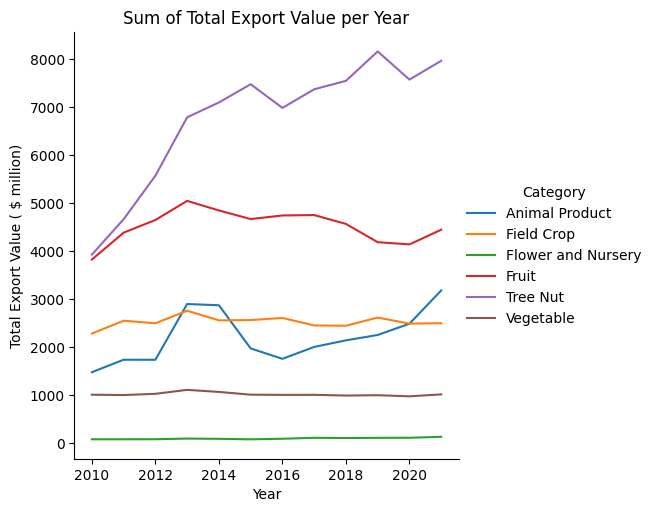

In [2737]:
# group exports by category and year, sum total export value for each group


export_totals= export_2010_2021.groupby(['Category','Year'])['Total Export Value ( $ million)'].sum().reset_index()

sns.relplot(export_totals, x= 'Year', y='Total Export Value ( $ million)',
            hue= 'Category', kind= 'line').set(title='Sum of Total Export Value per Year')



In [2496]:
export_2010_2021.describe()

,Total Export Value ( $ million)
count,672.000000
mean,306.380101
std,663.397802
min,2.843588
25%,25.012712
50%,62.588314
75%,314.268957
max,5143.722000


## Insights

- Tree Nuts had the highest total export value for each year. The largest increase of export value occurred from        2010 to 2012. There was a decrease in 2014-2016 but export value continued to increase after 2016

- Fruit was CA's second highest grossing export category from 2010-2020 
        
- Interestingly, it seems that around 2014/2015 all categories exprerienced a decrease in total export value. More      research is needed to find out reasons why this change occurred. Was it due to :
     Climate conditions? Market demand? Trade policies? Global conflicts? 
         
         
* According to https://www.bls.gov/opub/btn/volume-6/the-rise-and-fall-of-almond-prices-asia-drought-and-consumer-preference.htm:

     "The two main contributors to the global popularity of nuts were expanding Asian economies and shifting consumer preferences (for example, from peanuts and dairy milk to almonds and almond milk)." 

            ....

     "The long-term growth in demand for almonds can be largely attributed to the expanding economies of                                   Asian countries."


- Shifting consumer preferences in the EU appears to contribute heavily to CA export value of tree nuts
 
- This observation by bls.gov supports the data presented in the 'Desitnation Markets Viz' section of this notebook. India, China and the EU were responsible for the large increase in tree nut consumption
             
             
- Categories begin to stall again from 2019-2021 in their total export value. Could be due to Covid?

- The mean Export Value for California products from 2010-2021 was $ 306.3 million

## Destination Markets Viz

## what trends do we see for each of the top export markets from 2010-2021?

[Text(0.5, 1.0, 'Change in CA Export Value to Key Markets from 2010-2021')]

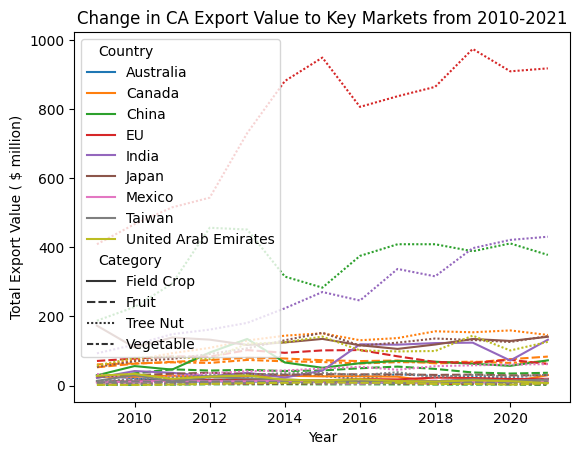

In [2418]:


growing_markets= destination_pdf_excel.groupby(['Country', 'Category', 'Year'])['Total Export Value ( $ million)'].mean().reset_index()


(sns.lineplot(growing_markets, x= 'Year', y='Total Export Value ( $ million)',
             hue= 'Country', style= 'Category')
.set(title= 'Change in CA Export Value to Key Markets from 2010-2021')
)


## Insights
   
- The EU, China, and India were the fastest growing markets for CA Tree Nuts, and returned the highest overall export market value for any category
        
- Tree nuts are California's highest grossing food category from 2009-2021
        
        

## how did each ag category perform in each country from 2010-2021?

[Text(0.5, 1.0, 'Total Export Value of all products in Category from 2010-2021'),
 Text(29.597222222222214, 0.5, 'Value ($ million)')]

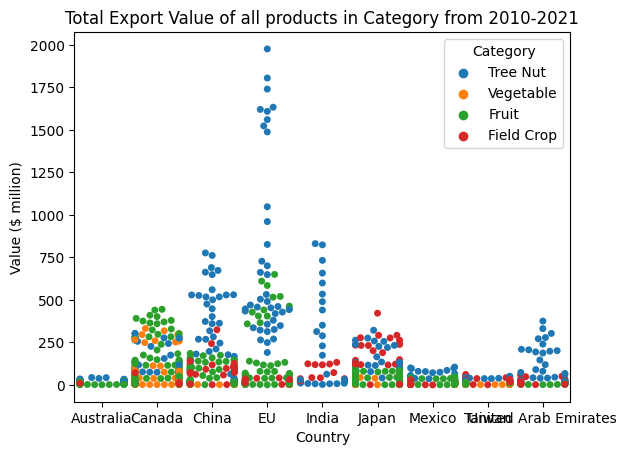

In [2444]:
(sns.swarmplot(data=destination_pdf_excel, x='Country', y='Total Export Value ( $ million)',
             hue='Category')
     .set(title= 'Total Export Value of all products in Category from 2010-2021',
          ylabel= 'Value ($ million)')
)

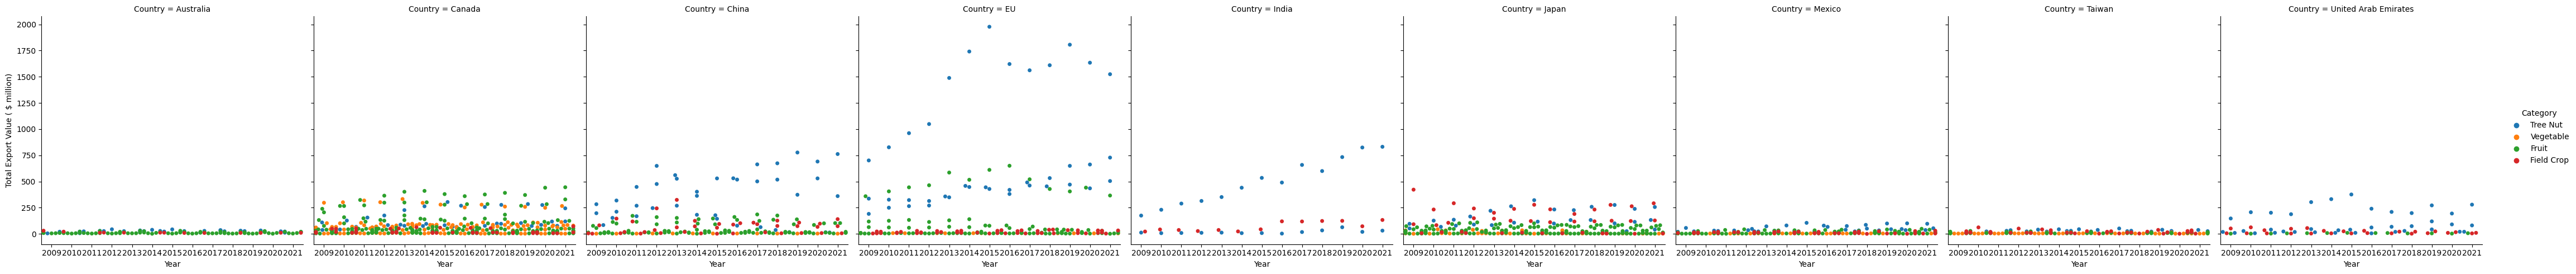

In [2445]:
sns.catplot(destination_pdf_excel, kind= 'swarm', x= 'Year', y= 'Total Export Value ( $ million)',
            hue= 'Category', col= 'Country'
           )

## Insights

- The tree nut category was California's highest-valued export category to China, India, Mexico,                        Arab Emirates, and the EU
           
- The highest valued CA export to Japan was Field Crops, the highest to Canada was Fruit

- China, India and the EU were the largest growing markets for CA ag categories. This was driven by tree nuts almost completely.

## how did each category change from year to year? what was yearly % change for each?

[Text(0.5, 1.0, 'Change in Export Value of CA Ag Categories from 2010-2021'),
 Text(0, 0.5, 'Export Value Change (millions $)')]

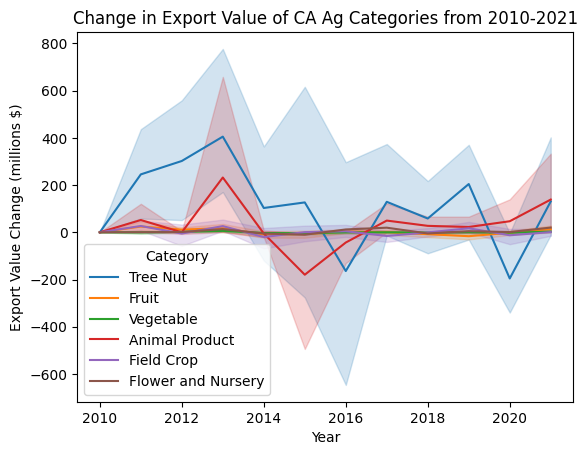

In [2415]:

product_percent_change= (export_2010_2021
               #.loc[(export_2010_2021['Year']== 2010) | (export_2010_2021['Year']== '2021')]
                .groupby(['Product', 'Category', 'Year'])['Total Export Value ( $ million)'].mean()
               .to_frame()
               .assign(Export_Value_Change= lambda x:x.groupby(['Product'])['Total Export Value ( $ million)'].diff().fillna(0),
                      Percent_Change= lambda x:x.groupby(['Product'])['Total Export Value ( $ million)'].pct_change().fillna(0)
                      )
               .assign(**{'Percent_Change': lambda x:x['Percent_Change']*100})       
               .reset_index()
               .round(2)
                      )

product_percent_change


(sns
   .lineplot(product_percent_change, x= 'Year', y='Export_Value_Change', hue='Category')
   .set(title= 'Change in Export Value of CA Ag Categories from 2010-2021',
         ylabel='Export Value Change (millions $)')
  )

#product_percent_change_pivot
#sns.heatmap(product_percent_change_pivot)



[Text(0.5, 1.0, '% Change in Export Value for Ag Categories from 2010-2021'),
 Text(0, 0.5, '% Change')]

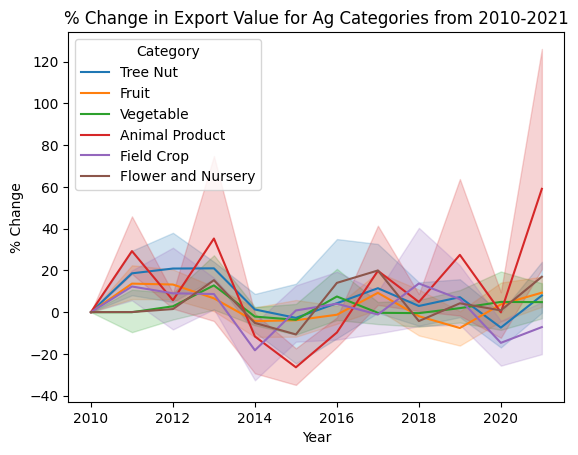

In [2420]:
# graph the % change in total export 

(sns
    .lineplot(product_percent_change,
                x= 'Year', y='Percent_Change', hue='Category')
    .set(title= '% Change in Export Value for Ag Categories from 2010-2021', ylabel= '% Change')
               )

In [2409]:
product_percent_change

,Product,Category,Year,Total Export Value ( $ million),Export_Value_Change,Percent_Change
0,Almonds,Tree Nut,2010,2391.68,0.00,0.00
1,Almonds,Tree Nut,2011,2828.43,436.75,18.26
2,Almonds,Tree Nut,2012,3387.33,558.90,19.76
3,Almonds,Tree Nut,2013,4164.00,776.67,22.93
4,Almonds,Tree Nut,2014,4527.53,363.53,8.73
...,...,...,...,...,...,...
667,Wine,Fruit,2017,1400.86,-92.64,-6.20
668,Wine,Fruit,2018,1326.86,-73.99,-5.28
669,Wine,Fruit,2019,1228.00,-98.86,-7.45
670,Wine,Fruit,2020,1143.00,-85.00,-6.92


In [2494]:
product_percent_change.describe()

,Total Export Value ( $ million),Export_Value_Change,Percent_Change
count,672.000000,672.000000,672.000000
mean,306.380283,9.868199,3.498854
std,663.397630,95.229498,22.181564
min,2.840000,-791.260000,-62.210000
25%,25.015000,-3.835000,-6.610000
50%,62.590000,0.000000,0.000000
75%,314.270000,6.427500,10.737500
max,5143.720000,1094.570000,191.670000


In [2499]:
# average export value of each California product from 2010-2021

product_percent_change.groupby(['Product'])['Total Export Value ( $ million)'].mean().reset_index().sort_values('Total Export Value ( $ million)', ascending= False)

,Product,Total Export Value ( $ million)
0,Almonds,4179.980833
18,Dairy And Products,1778.458333
38,Pistachios,1327.816667
55,Wine,1309.310833
53,Walnuts,1253.256667
48,Table Grapes,775.525833
43,Rice,737.399167
51,"Tomatoes, Processed",651.116667
35,Oranges And Products,625.487500
46,Strawberries,398.009167


## Insights

- Animal Products and Tree Nuts, which contribute largely to CA's total export value, both started to decrease in 2013 . While both categories eventually started to rise in 2015 and 2016, respectively, neither was able achieve the same growth seen from 2010 to 2013

- The Animal Products category appears to be most susceptible to volatility in total export value. While other agriculture categories remained relatively stable from 2010-2021, Animal Products experienced sharper increases and decreases in total export value year to year


- Animal Products suffered from the largest negative percent change from 2013-2015, at nearly -30%!

- Field Crops similarly had a large negative percent change from 2013-2014

- Flower and Nursery experienced a large growth from 2015 to 2017

- From 2010-2021, Almonds, Dairy and Products, Pistachios, Wine, and Walnuts were the top 5 highest-valued export products




## what were CA's highest grossing food items per category for each year?

In [2744]:

category_max= (export_2010_2021
                .loc[export_2010_2021
                      .groupby(['Category', 'Year'])['Total Export Value ( $ million)']
                      .transform(max)== export_2010_2021['Total Export Value ( $ million)']]
               .reset_index(drop=True)
               .round(2)
               .assign(** {'Total Export Value ( $ million)': lambda x:x['Total Export Value ( $ million)']*1000000})
               .rename(columns= {'Total Export Value ( $ million)': 'Total Export Value'})
              )


category_max


,Product,Category,Year,Total Export Value
0,Almonds,Tree Nut,2010,2.391680e+09
1,Wine,Fruit,2010,1.007790e+09
2,Lettuce,Vegetable,2010,3.374800e+08
3,Dairy And Products,Animal Product,2010,1.149900e+09
4,Rice,Field Crop,2010,7.968800e+08
...,...,...,...,...
67,Wine,Fruit,2021,1.288000e+09
68,Lettuce,Vegetable,2021,3.040000e+08
69,Dairy And Products,Animal Product,2021,2.537000e+09
70,Rice,Field Crop,2021,7.740000e+08


In [2747]:
# print the product name with the highest export value for each year

def print_export_product(df):
    most_value= df['Total Export Value'].max()
    year= df['Year'].iloc[0]
    product= df['Product'].iloc[0]
    print(f'{year}:')
    print(f'')
    print(f'Highest Export Value: {product} -> ${most_value} dollars')
    print(f'')

category_max.groupby(['Year']).apply(print_export_product)    

2010:

Highest Export Value: Almonds -> $2391680000.0 dollars

2011:

Highest Export Value: Almonds -> $2828430000.0 dollars

2012:

Highest Export Value: Almonds -> $3387330000.0 dollars

2013:

Highest Export Value: Almonds -> $4164000000.0 dollars

2014:

Highest Export Value: Almonds -> $4527530000.0 dollars

2015:

Highest Export Value: Almonds -> $5143720000.0 dollars

2016:

Highest Export Value: Almonds -> $4497250000.0 dollars

2017:

Highest Export Value: Almonds -> $4483390000.0 dollars

2018:

Highest Export Value: Almonds -> $4530440000.0 dollars

2019:

Highest Export Value: Almonds -> $4901000000.0 dollars

2020:

Highest Export Value: Almonds -> $4658000000.0 dollars

2021:

Highest Export Value: Almonds -> $4647000000.0 dollars



""


## Insights

- For each year from 2010-2021, almonds were consistently the number one valued California Ag product, having a peak export value of nearly $ 5.2 billion dollars in 2015!



## CA Shares 

In [1519]:
share_pdf_excel

,Product,Category,Year,Share
0,Almonds,Tree Nut,2009,100.0
1,Pistachios,Tree Nut,2009,100.0
2,Walnuts,Tree Nut,2009,100.0
3,Apples,Fruit,2009,2.4
4,Apricots,Fruit,2009,74.0
...,...,...,...,...
51,Seeds For Sowing,Field Crop,2021,19.5
52,Sweet Potatoes,Field Crop,2021,24.5
53,"Tomatoes, Processed",Field Crop,2021,100.0
54,Wheat,Field Crop,2021,0.2


<Axes: xlabel='Year', ylabel='Share'>

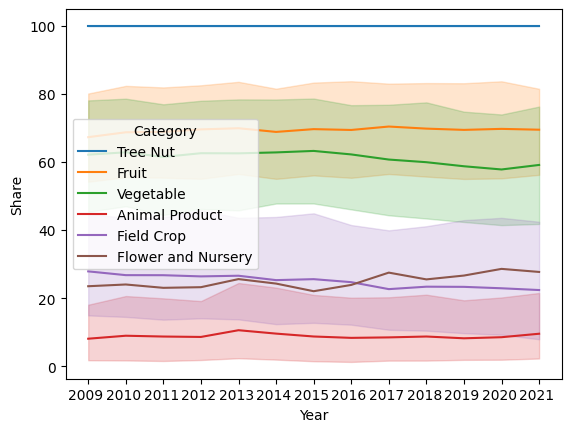

In [1761]:
# the bars of color represent confidence intervals for each category
    # confidence interval = mean of estimate +/- variation of estimate
        # probability that pop. parameter falls btwn two set values

sns.lineplot(data=share_pdf_excel, x='Year', y='Share', hue='Category')#, palette= 'rocket')

#sns.heatmap(data=share_pdf_excel)


## Insights - CA % Market Share of Total US Market for Categories

- From 2010-2021, CA occupied 100% of the US Tree Nut market share

- CA Fruit occupied 60-70% of total US Market share from 2010-2021

- Field Crop market share appears to decrease from 2010-2021 from ~25% to ~20% 

- CA Animal Products market share appeared to remain at around 10% from 2009-2021, and was CA lowest overall         market share despite being having a higher total export value than either Vegetables and Flower and                 Nursery 
            
            

# 6a. Questions to answer in Viz

1. What are the highest grossing products per county each year? 

In [2247]:
top_products

,County,Commodity,Year,% Value,Export Value
0,Butte,Walnuts (English),2017,14.8,255014.508
1,Butte,Walnuts (English),2015,15.6,241662.408
2,Butte,Walnuts (English),2016,15.6,235201.980
3,Butte,Walnuts (English),2019,14.2,214103.624
4,Butte,Rice (Excl. Seed),2020,18.3,179254.539
...,...,...,...,...,...
267,Yuba,Rice (Excl. Seed),2018,7.3,62729.338
268,Yuba,Rice (Excl. Seed),2019,6.2,59107.328
269,Yuba,Rice (Excl. Seed),2015,6.8,44551.220
270,Yuba,"Plums, Dried",2017,15.1,33697.009


2. Which counties earn the most for each product each year?
- for each Commodity, list the County with the highest Export value along with its year, and its Export Value 

In [2717]:
top_county

,Product,County,Year,% Value,Export Value,Category
0,Alfalfa,Imperial,2021,23.4,251781.426,Field Crop
1,Alfalfa,Imperial,2018,21.3,218884.338,Field Crop
2,Alfalfa,Imperial,2019,21.3,217310.268,Field Crop
3,Alfalfa,Imperial,2020,21.5,200873.640,Field Crop
4,Alfalfa,Imperial,2015,15.5,168565.445,Field Crop
...,...,...,...,...,...,...
486,Wheat,Imperial,2016,22.8,30987.024,Field Crop
487,Wheat,Fresno,2019,14.3,17914.039,Field Crop
488,Wheat,Imperial,2017,15.7,16836.994,Field Crop
489,Wheat,Fresno,2020,13.6,16066.768,Field Crop


In [2751]:
# function to print the county with the highest Export Value for each Commodity in that year

def print_largest_counties(df):
    most_value= df['Export Value'].apply(lambda x: '${:,.2f}'.format(x)).max()
    commodity= df['Product'].iloc[0]
    year= df['Year'].iloc[0]
    county= df['County'].iloc[0]
    print(f'{commodity}: ')
    print('')
    print(f'  County : {county} County ({year})')
    print(f'  Export Value: {most_value} dollars')
    print('')

top_county.groupby(['Product']).apply(print_largest_counties) 

Alfalfa: 

  County : Imperial County (2021)
  Export Value: $84,870,247.00 dollars

Almonds: 

  County : Kern County (2019)
  Export Value: $1,596,784,278.00 dollars

Apiary: 

  County : Fresno County (2021)
  Export Value: $133,259,539.00 dollars

Apples: 

  County : El Dorado County (2021)
  Export Value: $31,000,996.00 dollars

Apricots: 

  County : Stanislaus County (2016)
  Export Value: $23,961,687.00 dollars

Artichokes: 

  County : Monterey County (2018)
  Export Value: $53,177,820.00 dollars

Asparagus: 

  County : San Joaquin County (2015)
  Export Value: $32,739,849.00 dollars

Avocados: 

  County : Ventura County (2015)
  Export Value: $188,982,192.00 dollars

Bell And Chili Peppers: 

  County : Riverside County (2017)
  Export Value: $80,546,400.00 dollars

Blackberries: 

  County : Santa Cruz County (2021)
  Export Value: $69,182,803.00 dollars

Blueberries: 

  County : Tulare County (2018)
  Export Value: $96,746,560.00 dollars

Broccoli: 

  County : Monterey

""


3. what were CA's highest grossing product per food category for each year?

In [2752]:
category_max

,Product,Category,Year,Total Export Value
0,Almonds,Tree Nut,2010,2.391680e+09
1,Wine,Fruit,2010,1.007790e+09
2,Lettuce,Vegetable,2010,3.374800e+08
3,Dairy And Products,Animal Product,2010,1.149900e+09
4,Rice,Field Crop,2010,7.968800e+08
...,...,...,...,...
67,Wine,Fruit,2021,1.288000e+09
68,Lettuce,Vegetable,2021,3.040000e+08
69,Dairy And Products,Animal Product,2021,2.537000e+09
70,Rice,Field Crop,2021,7.740000e+08


4. what country is the fastest growing market for each category?
   for each year, which country has the highest increase in total export value?

In [2753]:
growing_markets

,Country,Category,Year,Total Export Value ( $ million)
0,Australia,Field Crop,2009,30.100000
1,Australia,Field Crop,2010,21.100000
2,Australia,Field Crop,2011,11.250000
3,Australia,Field Crop,2012,12.234000
4,Australia,Field Crop,2013,11.523000
...,...,...,...,...
411,United Arab Emirates,Tree Nut,2017,98.825667
412,United Arab Emirates,Tree Nut,2018,99.996937
413,United Arab Emirates,Tree Nut,2019,144.569688
414,United Arab Emirates,Tree Nut,2020,101.566667


In [2755]:
# adds % Change and Export Value change columns to the dataframe growing_markets. Calculate % change within groups,
 ## calculate the % difference as  [ [Total Export Value (row 1) - Total Export Value (row 2)]/ row 1 ] / 10011
    
    

growing_market_percent_change= (growing_markets
                               #.loc[(export_2010_2021['Year']== 2010) | (export_2010_2021['Year']== '2021')]
                                .groupby(['Country', 'Category', 'Year'])['Total Export Value ( $ million)'].mean()
                               .to_frame()
                               .assign(Export_Value_Change= lambda x:x.groupby(['Category'])['Total Export Value ( $ million)'].diff().fillna(0),
                                      #**{'Export_Percent_Value_Change': lambda x:x['Export_Percent_Value_Change']*100})
                                       Percent_Change= lambda x:x.groupby(['Category'])['Total Export Value ( $ million)'].pct_change().fillna(0)
                                      )
                               .assign(**{'Percent_Change': lambda x:x['Percent_Change']*100,
                                          #'Total Export Value ( $ million)': lambda x:x['Total Export Value ( $ million)']*1000000
                                         
                                         })
                               .reset_index()
                               .round(2)
                               
                               )   


growing_market_percent_change



,Country,Category,Year,Total Export Value ( $ million),Export_Value_Change,Percent_Change
0,Australia,Field Crop,2009,30.10,0.00,0.00
1,Australia,Field Crop,2010,21.10,-9.00,-29.90
2,Australia,Field Crop,2011,11.25,-9.85,-46.68
3,Australia,Field Crop,2012,12.23,0.98,8.75
4,Australia,Field Crop,2013,11.52,-0.71,-5.81
...,...,...,...,...,...,...
411,United Arab Emirates,Tree Nut,2017,98.83,-3.05,-3.00
412,United Arab Emirates,Tree Nut,2018,100.00,1.17,1.19
413,United Arab Emirates,Tree Nut,2019,144.57,44.57,44.57
414,United Arab Emirates,Tree Nut,2020,101.57,-43.00,-29.75


# 6a- Export all dataframes to excel in the same workbook

In [2756]:
#def to_excel(df, sheet_name):
 #   df.to_excel('New-Market_Analysis.xlsx',sheet_name=sheet_name)
    
#share_pdf_excel.to_excel('New-Market_Analysis.xlsx', '% CA Export Share') 
#destination_pdf_excel.to_excel('New-Market_Analysis.xlsx', 'Top 15 Export Markets')
#export_2010_2021.to_excel('New-Market_Analysis.xlsx','Total Exports')


with pd.ExcelWriter('Final_Market_Analysis3.xlsx') as writer:  
    share_pdf_excel.to_excel(writer, sheet_name='% CA Export Share', index=False)
    destination_pdf_excel.to_excel(writer, sheet_name='Top 15 Export Markets', index=False)
    growing_market_percent_change.to_excel(writer,sheet_name= 'Changes in Export Markets')
    export_2010_2021.to_excel(writer, sheet_name='Total Exports', index=False)
    category_max.to_excel(writer, sheet_name = 'Highest Grossing Product per Category', index=False)
    top_products.to_excel(writer,sheet_name = 'Top Products per County', index= False)
    top_county.to_excel(writer,sheet_name = 'Top County per Product', index= False)
    county_joined.to_excel(writer, sheet_name= 'Counties Joined', index= False)
   
     

In [2686]:
with pd.ExcelWriter('Final_Market_Analysis.xlsx') as writer: 
    county_joined.to_excel(writer, sheet_name= 'Counties Joined Fixed', index=False)